In [114]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
from textwrap import wrap
import statsmodels.api as sm
import seaborn as sns

#always make it pretty
plt.style.use('ggplot')
font = {'weight': 'bold',
        'size':   16}
plt.rc('font', **font)

In [27]:
df = pd.read_csv('./data/monthly_data_withdates.csv')
df['y_m'] = df['date'].str.replace("-", "").astype(int)-20000000
df = df.groupby('y_m').mean().reset_index()
df = df.reset_index()
df.rename(columns={'index': 'month_index'}, inplace=True)
df

,month_index,y_m,countyfips,year,month,pdsi,spei,drought_vals,Water Level Depth
0,0,101,8062.234375,2000.0,1.0,-1.401406,0.296719,0.585938,189.352222
1,1,201,8062.234375,2000.0,2.0,-1.450937,-0.492344,0.359375,7.342500
2,2,301,8062.234375,2000.0,3.0,-0.605156,0.968125,0.113281,415.144444
3,3,401,8062.234375,2000.0,4.0,-1.029531,-0.767500,0.058594,166.192500
4,4,501,8062.234375,2000.0,5.0,-1.786562,-1.144375,0.062500,32.625000
...,...,...,...,...,...,...,...,...,...
199,199,160801,8062.234375,2016.0,8.0,-0.271875,0.412187,0.603125,NaN
200,200,160901,8062.234375,2016.0,9.0,-0.758437,-0.648125,0.667969,-499977.745000
201,201,161001,8062.234375,2016.0,10.0,-1.480781,-1.740781,0.855469,209.726111
202,202,161101,8062.234375,2016.0,11.0,-1.920625,-0.719062,1.625000,508.020000


In [ ]:
gw = df.copy()
gw.dropna(inplace=True)
gw = gw[gw['Water Level Depth'] >0]
gw['Water Level Depth'] = gw['Water Level Depth'] * -1
gw

## Four main variables of interest over time (2000 - 2016)

<ipython-input-61-142a6f703ef6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels)
<ipython-input-61-142a6f703ef6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels)
<ipython-input-61-142a6f703ef6>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(labels)
<ipython-input-61-142a6f703ef6>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_xticklabels(labels);


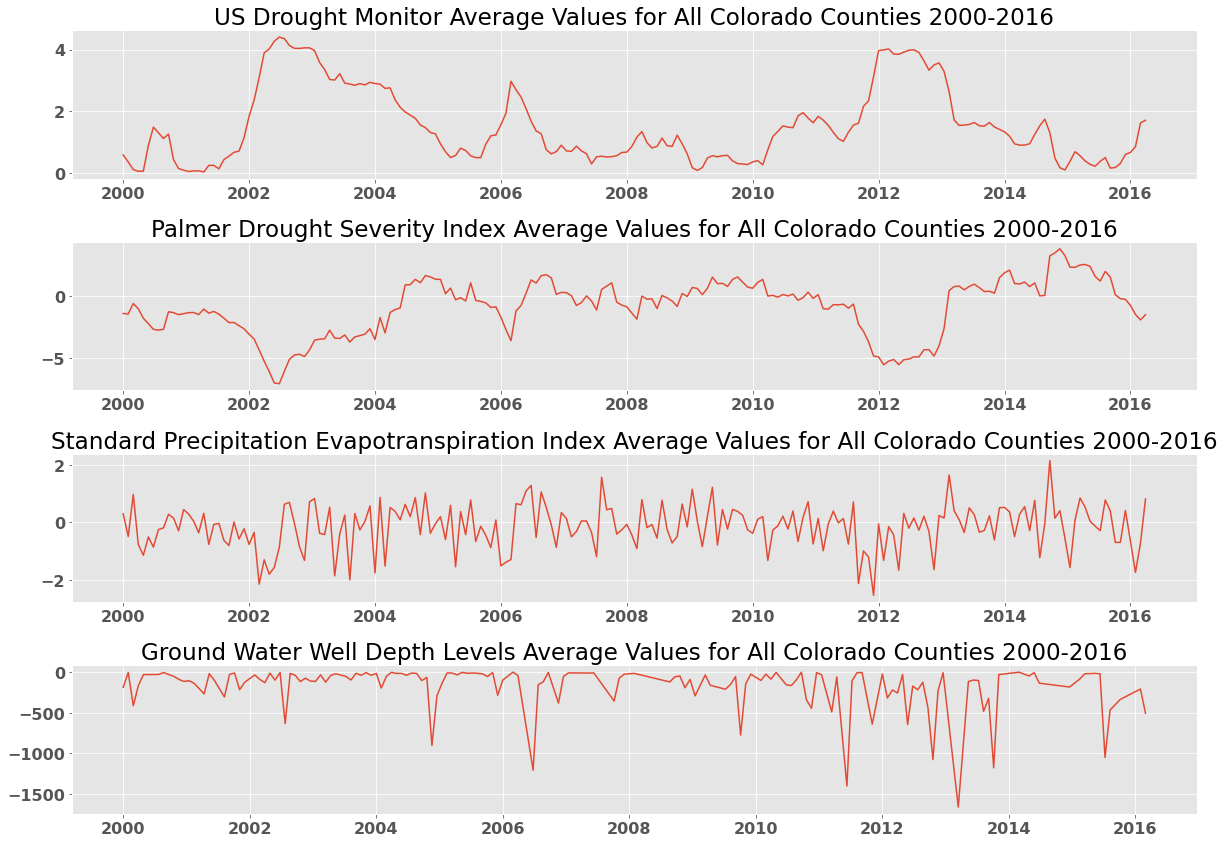

In [61]:
fig, ax = plt.subplots(4, 1, figsize=(17, 12), tight_layout=True)
fig.canvas.draw()

labels=[year for year in x]
x= np.arange(1998, 2018, 2)

ax[0].plot(df['month_index'], df['drought_vals'])
ax[0].set_title('US Drought Monitor Average Values for All Colorado Counties 2000-2016')
ax[0].set_xticklabels(labels)

ax[1].plot(df['month_index'], df['pdsi'])
ax[1].set_title('Palmer Drought Severity Index Average Values for All Colorado Counties 2000-2016', wrap=True)
ax[1].set_xticklabels(labels)

ax[2].plot(df['month_index'], df['spei'])
ax[2].set_title('Standard Precipitation Evapotranspiration Index Average Values for All Colorado Counties 2000-2016', wrap=True)
ax[2].set_xticklabels(labels)

ax[3].plot(gw['month_index'], gw['Water Level Depth'])
ax[3].set_title('Ground Water Well Depth Levels Average Values for All Colorado Counties 2000-2016', wrap=True)
ax[3].set_xticklabels(labels);

## Correlation between four variables of interest

In [38]:
spearman_df = df.loc[:, ['pdsi', 'spei', 'drought_vals', 'Water Level Depth']]
spearman_df

,pdsi,spei,drought_vals,Water Level Depth
0,-1.401406,0.296719,0.585938,189.352222
1,-1.450937,-0.492344,0.359375,7.342500
2,-0.605156,0.968125,0.113281,415.144444
3,-1.029531,-0.767500,0.058594,166.192500
4,-1.786562,-1.144375,0.062500,32.625000
...,...,...,...,...
199,-0.271875,0.412187,0.603125,NaN
200,-0.758437,-0.648125,0.667969,-499977.745000
201,-1.480781,-1.740781,0.855469,209.726111
202,-1.920625,-0.719062,1.625000,508.020000


In [45]:
#use spearman instead of pearson because can drop null values
corr_matrix, pval_matrix = stats.spearmanr(spearman_df, nan_policy='omit')

print(corr_matrix, "\n", "\n")

#output is a two-sided p-value for a hypothesis test whoe null hypothesis is that two sets of data are uncorrelated 
print(pval_matrix)

[[ 1.          0.41526599 -0.55496721 -0.04976391]
 [ 0.41526599  1.         -0.07534112  0.08297814]
 [-0.55496721 -0.07534112  1.          0.03949137]
 [-0.04976391  0.08297814  0.03949137  1.        ]] 
 

[[0.00000000e+00 6.57898102e-10 7.09966070e-18 5.25583098e-01]
 [6.57898102e-10 0.00000000e+00 2.84170752e-01 2.89327092e-01]
 [7.09966070e-18 2.84170752e-01 0.00000000e+00 6.14531278e-01]
 [5.25583098e-01 2.89327092e-01 6.14531278e-01 0.00000000e+00]]


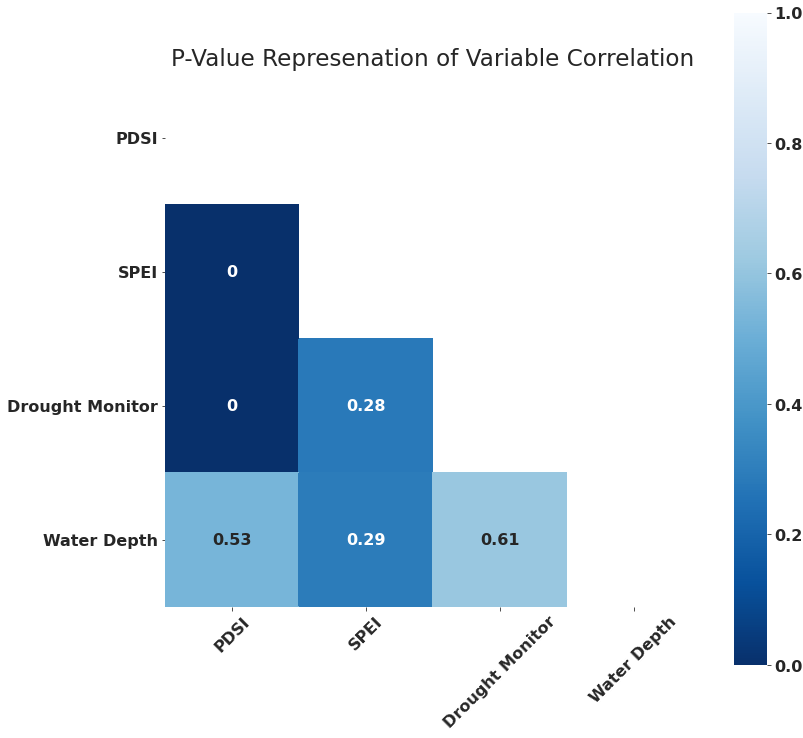

In [154]:
#heat map for p-value matrix
variables = ['PDSI', 'SPEI', 'Drought Monitor', 'Water Depth']
pvals = np.around(pval_matrix, 2)

mask = np.zeros_like(pval_matrix)   
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12,12))
    ax = sns.heatmap(pvals, mask=mask, vmax =1, square=True, annot=True, cmap='Blues_r')

    ax.set_xticklabels(variables)
    ax.set_yticklabels(variables)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha='center' )
    plt.setp(ax.get_yticklabels(), rotation= 0)
    ax.set_title('P-Value Represenation of Variable Correlation')